##### Python for High School (Summer 2022)

* [Table of Contents](PY4HS.ipynb)
* <a href="https://colab.research.google.com/github/4dsolutions/elite_school/blob/master/Py4HS_August_19_2022.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
* [![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.org/github/4dsolutions/elite_school/blob/master/Py4HS_August_19_2022.ipynb)

# Generating Random Tetrahedra in the IVM, and Computing Their Tetravolumes

Our study circle learned of these whole number volume tetrahedrons when collaborating on Synergeo, or an incarnation thereof, one in a series of listservs frequented by those into Synergetics, with Synergetics being a geometry-intensive philosophy developed over a lifetime by the American inventor R. Buckminster Fuller.

My recollection is Dr. Bob Gray came up with a proof, probably in the late 1990s.

In [1]:
from IPython.display import YouTubeVideo

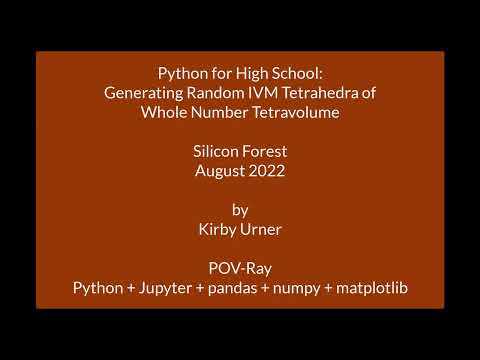

In [2]:
YouTubeVideo('ik4Z1x-NB0Y')

# Generator Objects

Let's get back to one of the core object types already included in Python:  the generator.

Where might we already have seen the generator concept introduced?  Did we talk about [farmworld.py](farmworld.py)?

In [3]:
def Gen():
    yield 1
    yield 2
    yield 3
    
for it in Gen():
    print(it)

1
2
3


In [4]:
obj = Gen()

In [5]:
for x in obj:
    print(x)

1
2
3


Upon reaching any `yield obj` statement, the called generator function (a function with `yield` inside) is obliged to relinquish control back to the caller.  Like `return` does.  

Then, in response to a "nudge" (as in the above for loop), said generator behaves as an iterator, as the target of `for`.  

Think of `for` as pressing the iterator's `__next__` button.

In [6]:
def Gen():
    yield '🍒'
    yield '⚓'
    yield '🧠'
    
gen = Gen()
print(gen.__next__())
print(gen.__next__())
print(gen.__next__())

🍒
⚓
🧠


What if you "go too far" i.e. hit the `__next__` button more times than we have `yield`?

In [7]:
try:
    print(gen.__next__())
except StopIteration:
    print("""Lets catch the exception and say something 
civilized vs getting a pink patch. An exception 
gets raised if you push an iterator too far.""")

Lets catch the exception and say something 
civilized vs getting a pink patch. An exception 
gets raised if you push an iterator too far.


A good question is:  at what point did we ever define a `__next__` method for Gen, which we expressed as something more like an ordinary function, with keyword `def`?

The answer:  the function-looking syntax involving `def` and `yield` is exactly what Python needs to create an object with a `__next__` method.  You do not have to write it, just know what it does:  it nudges the object to continue running from where it left off (or from the top), and to the next yield.

In [8]:
gen_object = Gen()

In [9]:
next(gen_object)  # triggers internal __next__

'🍒'

In [10]:
gen_object.__next__()  # same thing

'⚓'

In [11]:
"__next__" in dir(gen_object)

True

A generator with a `yield` inside of a `while True` loop never need run out of `yield` statements.  Such iterators pose a danger if used naively, i.e. if left to iterate unchecked.

For example, the Fibonacci Series:

In [12]:
def fibo(a=0, b=1):
    """
    https://oeis.org/A000045
    """
    yield a
    while True:
        yield b
        a, b = b, b + a

In [13]:
fib_gen = fibo()  # as yet, no yield is reached.  

# Lets feed to next( ), 10 times

for _ in range(30):
    print(next(fib_gen))  # run to the next yield, same as "nudge"

0
1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987
1597
2584
4181
6765
10946
17711
28657
46368
75025
121393
196418
317811
514229


Lets to sphere packing, [A005901](https://oeis.org/A005901):


<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/51522139740/in/photolist-8thDyL-2muQr99-2msgzQd-2msj6xS-2mgJNog-2m44aqr-22yg9uX-FMLvQQ-NzckH4-EPg3Ag-CMbRqK-dMGmVw-agu9Xx-8xp2z5-8vatB3-8ti2xi-8oX85J-6Wcvue-5QyKim" title="Growing Sphere Packing"><img src="https://live.staticflickr.com/65535/51522139740_b16f97cc96_m.jpg" width="225" height="210" alt="Growing Sphere Packing"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

*Figure 1:  CCP*

Remember sphere packing?

[Sphere Packing](Py4HS_sphere_packing_classroom.ipynb)

In [14]:
def ccp_ball_layers():
    yield 1
    f = 1
    while True:
        yield 10 * f * f + 2
        f += 1

In [15]:
layers = ccp_ball_layers()  # as yet, no yield is reached.  

# Lets feed to next( ), 10 times

for _ in range(10):
    print(next(layers))  # run to the next yield, same as "nudge"

1
12
42
92
162
252
362
492
642
812


### More Advanced...

The generator type also supports a `send`, allowing objects from outside to come in through a yield statement.

In [16]:
def Gen():
  r = 0
  yield 1
  r = yield 2 # send in an object
  yield r     # anything sent in?
  yield 'Done'


In [17]:
gen_object = Gen()

In [18]:
next(gen_object)

1

In [19]:
next(gen_object)

2

In [20]:
gen_object.send('🍒')

'🍒'

In [21]:
next(gen_object)

'Done'

### Generator Classes

A generator class is just an iterator type, meaning it has both `__next__` and `__iter__` methods.  The latter is tasked with producing an iterator, and `self` is oft used.  The former defines what "to nudge forward" means, i.e what results.

In the section below, the Turtle class turns out to be an iterator.  We could also write one as a generator function, with a `while True` loop.

# Martian Math

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/52283684666/in/dateposted-public/" title="Abduction"><img src="https://live.staticflickr.com/65535/52283684666_4438189883_n.jpg" width="320" height="240" alt="Abduction"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

[Where is this?](https://flic.kr/p/2nFgKLD)

Buried in this repo, are the exotic tools you need to play with Quadray Coordinates.

What's a Quadray?

## Quadrays 
Each Qvector is defined using 4-tuples representing 4 positively scaled and additively combined elementary rays. 

These four elementary rays originate from the origin (0,0,0,0) and go to the 4 corners of a regular tetrahedron: (1,0,0,0) (0,1,0,0) (0,0,1,0) and (0,0,0,1). See Figure 2.

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/4073009388/" title="Quadray Coordinates"><img src="https://live.staticflickr.com/2693/4073009388_e1da93dbd4_w.jpg" width="400" height="350" alt="Quadray Coordinates"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

*Figure 2*

In [22]:
import qrays
from qrays import Qvector
from itertools import permutations

![](https://farm1.staticflickr.com/703/20468732673_8a69b40559_o.jpg)

*Figure 3*

In [23]:
# Quadray Basis Vectors
a = Qvector((1,0,0,0))
b = Qvector((0,1,0,0))
c = Qvector((0,0,1,0))
d = Qvector((0,0,0,1))

caltrop = [a, b, c, d]

Two of one Qvector, and one of two others, added together, gives one of 12 directions to one of the neighboring balls (12-around-1).



In [24]:
gen_perms = permutations((2, 1, 1, 0)) 
twelve_directions = list({Qvector(p) for p in gen_perms})

for v in twelve_directions:
    print(v)

ivm_vector(a=1, b=0, c=1, d=2)
ivm_vector(a=2, b=1, c=1, d=0)
ivm_vector(a=1, b=1, c=2, d=0)
ivm_vector(a=0, b=1, c=2, d=1)
ivm_vector(a=1, b=0, c=2, d=1)
ivm_vector(a=1, b=2, c=0, d=1)
ivm_vector(a=2, b=1, c=0, d=1)
ivm_vector(a=2, b=0, c=1, d=1)
ivm_vector(a=1, b=1, c=0, d=2)
ivm_vector(a=1, b=2, c=1, d=0)
ivm_vector(a=0, b=2, c=1, d=1)
ivm_vector(a=0, b=1, c=1, d=2)


From [*Tetravolumes with Quadrays*](https://github.com/4dsolutions/School_of_Tomorrow/blob/master/Qvolume.ipynb):

A Quadrays Tetrahedron Volume Formula from Tom Ace, and modded for Tetravolumes:

$$
V_{ivm} = (1/4) 
\begin{vmatrix}
a0&a1&a2&a3&1\\
b0&b1&b2&b3&1\\
c0&c1&c2&c3&1\\
d0&d1&d2&d3&1\\
1&1&1&1&0\\
\end{vmatrix}
$$
<br />
Take the absolute value of that determinant if you wish only positive values for the tetrahedron's tetravolume.

What tetrahedron?

The one defined by the four Quadrays or Qvectors embedded as the first four rows in the matrix.

More [Volume Talk](https://github.com/4dsolutions/School_of_Tomorrow/blob/master/VolumeTalk.ipynb).

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/4949801610/in/photolist-2m29ojG-5DsYaY-2i3qGpP-8EDNfx-8xp2z5-6wUiRq" title="Sphere Packing"><img src="https://live.staticflickr.com/4146/4949801610_da3fc94b2c_n.jpg" width="240" height="320" alt="Sphere Packing"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

### Turtle Experiment

A Turtle is able to move in any of 12 directions when nudged, but only randomly.

Take four such turtles and let them random walk for n iterations, then check the volume of the resulting tetrahedron, defined by the turtles as four corners.

The moving convention ensures each turtle is always at the center of a CCP sphere (cubic closest packing), or sometimes we say "IVM sphere" instead (thinking more cuboctahedrally), or even "FCC" (face-centered cubic).

The surprising result is the resulting random tetrahedron is always whole number volumed, in terms of tetravolumes, i.e. the unit volume is defined by the centers of 4 IVM balls packed together.

In [25]:
from random import choice 

class Turtle:
    """
    I start at (0,0,0,0) and move in the 12 directions
    
    Requires twelve_directions as global, read-only
    """
    
    def __init__(self, pos=Qvector((0,0,0,0))):
        self.pos = pos
        
    def __next__(self):
        self.pos = self.pos + choice(twelve_directions)
        
    def __iter__(self):
        return self
    
    @property
    def coords(self):
        return self.pos.coords
    
    def __repr__(self):
        return f"Turtle at {self.pos}"

![cubocta](https://upload.wikimedia.org/wikipedia/commons/d/dc/Povlabels.gif)

*Figure 4*

In [26]:
t0 = Turtle()

In [27]:
t0

Turtle at ivm_vector(a=0, b=0, c=0, d=0)

In [28]:
t0.coords

ivm_vector(a=0, b=0, c=0, d=0)

In [29]:
for _ in range(100):
    next(t0)
t0

Turtle at ivm_vector(a=3, b=1, c=0, d=8)

In [30]:
t0.pos.length()

4.358898943540674

In [31]:
next(t0)
t0

Turtle at ivm_vector(a=2, b=2, c=0, d=8)

In [32]:
def experiment(steps):
    t0 = Turtle()
    t1 = Turtle()
    t2 = Turtle()
    t3 = Turtle()
    for _ in range(steps):
        next(t0)
        next(t1)
        next(t2)
        next(t3)
    return (t0, t1, t2, t3)



<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/51522139740/in/photolist-8thDyL-2muQr99-2msgzQd-2msj6xS-2mgJNog-2m44aqr-22yg9uX-FMLvQQ-NzckH4-EPg3Ag-CMbRqK-dMGmVw-agu9Xx-8xp2z5-8vatB3-8ti2xi-8oX85J-6Wcvue-5QyKim" title="Growing Sphere Packing"><img src="https://live.staticflickr.com/65535/51522139740_b16f97cc96_m.jpg" width="225" height="210" alt="Growing Sphere Packing"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

*Figure 5:  CCP*

In [33]:
rand_tet = experiment(400)

In [34]:
rand_tet

(Turtle at ivm_vector(a=19, b=32, c=0, d=49),
 Turtle at ivm_vector(a=48, b=16, c=44, d=0),
 Turtle at ivm_vector(a=22, b=8, c=0, d=2),
 Turtle at ivm_vector(a=17, b=5, c=0, d=10))

In [35]:
import numpy as np

def ivm_volume(q0, q1, q2, q3, dtype=np.float64):
    """
    improved:  more flexible as to element type
    """
    A = np.ones((5,5), dtype)
    A[4,4] = 0
    A[0,0:4] = q0.coords
    A[1,0:4] = q1.coords
    A[2,0:4] = q2.coords
    A[3,0:4] = q3.coords
    print(A)
    return abs(np.linalg.det(A))/4

$$
V_{ivm} = (1/4) 
\begin{vmatrix}
a0&a1&a2&a3&1\\
b0&b1&b2&b3&1\\
c0&c1&c2&c3&1\\
d0&d1&d2&d3&1\\
1&1&1&1&0\\
\end{vmatrix}
$$

In [36]:
ivm_volume(rand_tet[0], 
           rand_tet[1],
           rand_tet[2],
           rand_tet[3])

[[19. 32.  0. 49.  1.]
 [48. 16. 44.  0.  1.]
 [22.  8.  0.  2.  1.]
 [17.  5.  0. 10.  1.]
 [ 1.  1.  1.  1.  0.]]


1083.0000000000011

In [37]:
# keep rerunning me
rand_tet = experiment(400)
v = ivm_volume(rand_tet[0], 
               rand_tet[1],
               rand_tet[2],
               rand_tet[3])
round(v, 10) # actual results are exact

[[ 0. 18. 19. 47.  1.]
 [ 0. 25. 40. 15.  1.]
 [50.  0. 46. 16.  1.]
 [ 0.  1. 12.  7.  1.]
 [ 1.  1.  1.  1.  0.]]


7113.0

In [38]:
? np.round

Signature:  np.round(a, decimals=0, out=None)
Docstring:
Round an array to the given number of decimals.

See Also
--------
around : equivalent function; see for details.
File:      ~/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py
Type:      function


### Histogram of Random Volumes

Lets run our experiment a few thousand times and see how the volumes bin out.

In [39]:
import pandas as pd
import numpy as np

In [40]:
def ivm_volume(q0, q1, q2, q3, dtype=np.float64):
    """
    improved:  more flexible as to element type
    """
    A = np.ones((5,5), dtype)
    A[4,4] = 0
    A[0,0:4] = q0.coords
    A[1,0:4] = q1.coords
    A[2,0:4] = q2.coords
    A[3,0:4] = q3.coords
    return abs(np.linalg.det(A))/4

In [41]:
def experiment(steps):
    t0 = Turtle()
    t1 = Turtle()
    t2 = Turtle()
    t3 = Turtle()
    for _ in range(steps):
        next(t0)
        next(t1)
        next(t2)
        next(t3)
    return (t0, t1, t2, t3)

In [42]:
def rand_volume(n=400):
    # keep rerunning me
    rand_tet = experiment(n)
    v = ivm_volume(rand_tet[0], 
                   rand_tet[1],
                   rand_tet[2],
                   rand_tet[3])
    return round(v, 10) # actual results are exact

In [43]:
samples = np.array([rand_volume(9) for _ in range(200)])

In [44]:
df = pd.DataFrame(samples, columns=["Volumes"])
df.head()

,Volumes
0,7.0
1,2.0
2,28.0
3,44.0
4,6.0


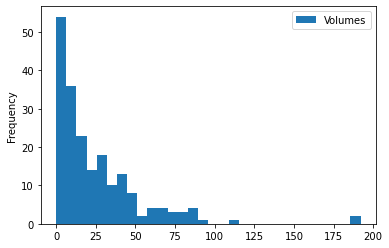

In [45]:
df.plot(kind="hist", bins=30, column="Volumes");

### Visualization

We have the ability to "perspective paint" our random tetrahedrons.  Let's do that with a few of them.

In [46]:
a

ivm_vector(a=1, b=0, c=0, d=0)

In [47]:
a.coords

ivm_vector(a=1, b=0, c=0, d=0)

In [48]:
import pov

In [49]:
q0,q1,q2,q3 = experiment(9)
for v in q0,q1,q2,q3:
    print(v.coords)

ivm_vector(a=4, b=1, c=0, d=3)
ivm_vector(a=4, b=9, c=3, d=0)
ivm_vector(a=4, b=0, c=3, d=1)
ivm_vector(a=1, b=4, c=0, d=7)


In [50]:
pov.scenario6(q0, q1, q2, q3)

In [51]:
ivm_volume(q0,q1,q2,q3)

65.99999999999999

In [52]:
vols = []
frame_no = 0
while frame_no < 12:
    q0,q1,q2,q3 = experiment(9)
    vol = int(round(ivm_volume(q0,q1,q2,q3), 0))
    if vol == 0:
        continue
    pov.scenario6(q0, q1, q2, q3, frame_no)
    vols.append(vol)
    frame_no += 1 

At this point we need to batch render the `frame0.pov`, `frame1.pov`, `frame2.pov`... files generated by `pov.scenario6`.  The source code is in [pov.py](pov.py).

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/52301671924/in/dateposted-public/" title="Screen Shot 2022-08-21 at 10.59.03 AM"><img src="https://live.staticflickr.com/65535/52301671924_134e3efcc0_z.jpg" width="640" height="393" alt="Screen Shot 2022-08-21 at 10.59.03 AM"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

In [53]:
len(vols)

12

In [54]:
import matplotlib.pyplot as plt
from matplotlib import gridspec

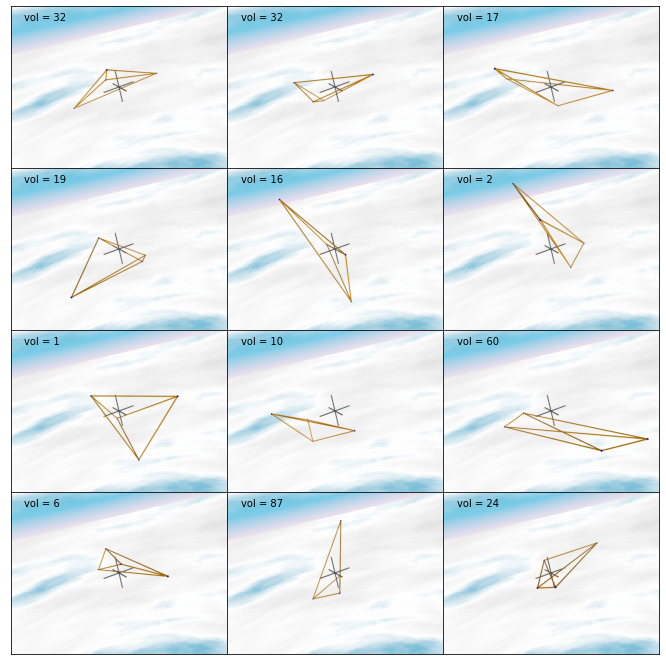

In [55]:
nrow = 4
ncol = 3

fig = plt.figure(figsize=(13.35,10)) 

gs = gridspec.GridSpec(nrow, ncol, width_ratios=[1, 1, 1],
         wspace=0.0, hspace=0.0, top=0.95, bottom=0.05, left=0.17, right=0.845) 

frameno=0
for i in range(nrow):
    for j in range(ncol):
        ax= plt.subplot(gs[i,j])
        filename = './anim/frame' + str(frameno) + '.png'
        thisImage = plt.imread(filename)
        ax.imshow(thisImage)
        ax.set_xticklabels([])
        ax.set_xticks([])
        ax.set_yticklabels([])
        ax.set_yticks([])
        plt.text(50,50,"vol = {}".format(int(vols[frameno])))
        frameno += 1
plt.show();

In [56]:
fig.savefig("random_tets.png")

In [57]:
(a-b).length()

1.0

In [58]:
pov.POV_Vector(1,0,0).length

1.0

### Addendum:  High Precision 

Using sympy, we have the ability to use higher precision numbers.  

In some sense, we shouldn't have to, because the particular way Turtles wander keeps us to whole number Quadray coordinates, and the determinant, given integer elements, [should always return an integer](https://math.stackexchange.com/questions/3294322/why-is-the-determinant-of-an-integer-matrix-always-an-integer).  The only requirement for a whole number volume, then, is that the absolute value of the determinant be evenly divisible by 4.

$$
V_{ivm} = (1/4) 
\begin{vmatrix}
a0&a1&a2&a3&1\\
b0&b1&b2&b3&1\\
c0&c1&c2&c3&1\\
d0&d1&d2&d3&1\\
1&1&1&1&0\\
\end{vmatrix}
$$

However, the numpy algorithm for taking a determinant, in using shortcuts, drops us into the realm of floating points, and [tiny inaccuracies](https://stackoverflow.com/questions/59976159/numpy-matrix-determinant-not-working-as-expected) creep in.  Sympy does not take the same shortcuts apparently, and we get our expected pure integer output.

In [59]:
import sympy as spy

In [60]:
def ivm_volume(q0, q1, q2, q3):
    """
    revised to work in sympy
    """
    A = [[0,0,0,0],
         [0,0,0,0],
         [0,0,0,0],
         [0,0,0,0]]
    A[0][0:4] = q0.coords
    A[1][0:4] = q1.coords
    A[2][0:4] = q2.coords
    A[3][0:4] = q3.coords
    A = spy.Matrix(A)
    return abs(A.det())/4

In [61]:
ivm_volume(q0,q1,q2,q3)

63

In [62]:
def rand_volume(n=400):
    # keep rerunning me
    rand_tet = experiment(n)
    v = ivm_volume(rand_tet[0], 
                   rand_tet[1],
                   rand_tet[2],
                   rand_tet[3])
    return v 

In [63]:
rand_volume()

2778